# Glass Identification

Project Description

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.
Attribute Information-
1.	 Id number: 1 to 214

2.	 RI: refractive index

3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

4.	Mg: Magnesium

5.	Al: Aluminum

6.	Si: Silicon

7.	K: Potassium

8.	Ca: Calcium

9.	Ba: Barium

10.	Fe: Iron

11.	Type of glass: (class attribute)

•	1- building_windows_float_processed

•	2- building_windows_non_float_processed

•	3- vehicle_windows_float_processed

•	4- vehicle_windows_non_float_processed (none in this database)

•	5- containers

•	6- tableware

•	7- headlamps

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 

Predict : Type of glass

Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Glass%20Identification/Glass%20Identification.csv


In [ ]:
# import necessory library 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [59]:
# download data file in local system

df=pd.read_csv(r"C:\Assignements & HW\Internship\project1\Glass Identification1.csv")
df

,ID Number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [60]:
# check shape and header 
print("the dimension of the dataset", df.shape)
print(f"\n  the column headers in the dataset:{df.columns}")


the dimension of the dataset (214, 11)

  the column headers in the dataset:Index(['ID Number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass'],
      dtype='object')


In [61]:
# check the data type
df.dtypes

ID Number          int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of glass      int64
dtype: object

In [62]:
# check null value 
df.isnull().sum()

ID Number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [63]:
# check information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID Number      214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


<Axes: >

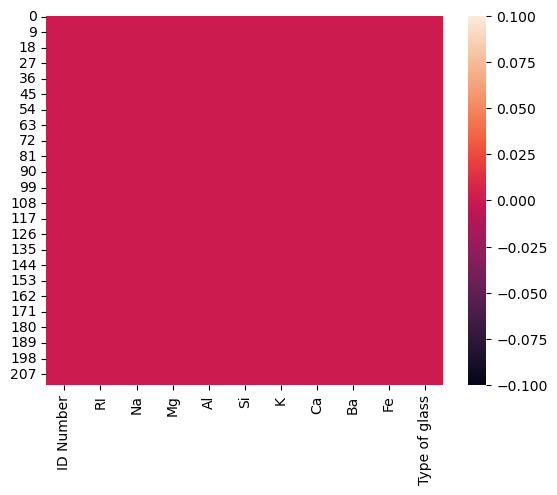

In [64]:
# draw heatmap
sns.heatmap(df.isnull())

In [65]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
ID Number,214
RI,178
Na,142
Mg,94
Al,118
Si,133
K,65
Ca,143
Ba,34
Fe,32


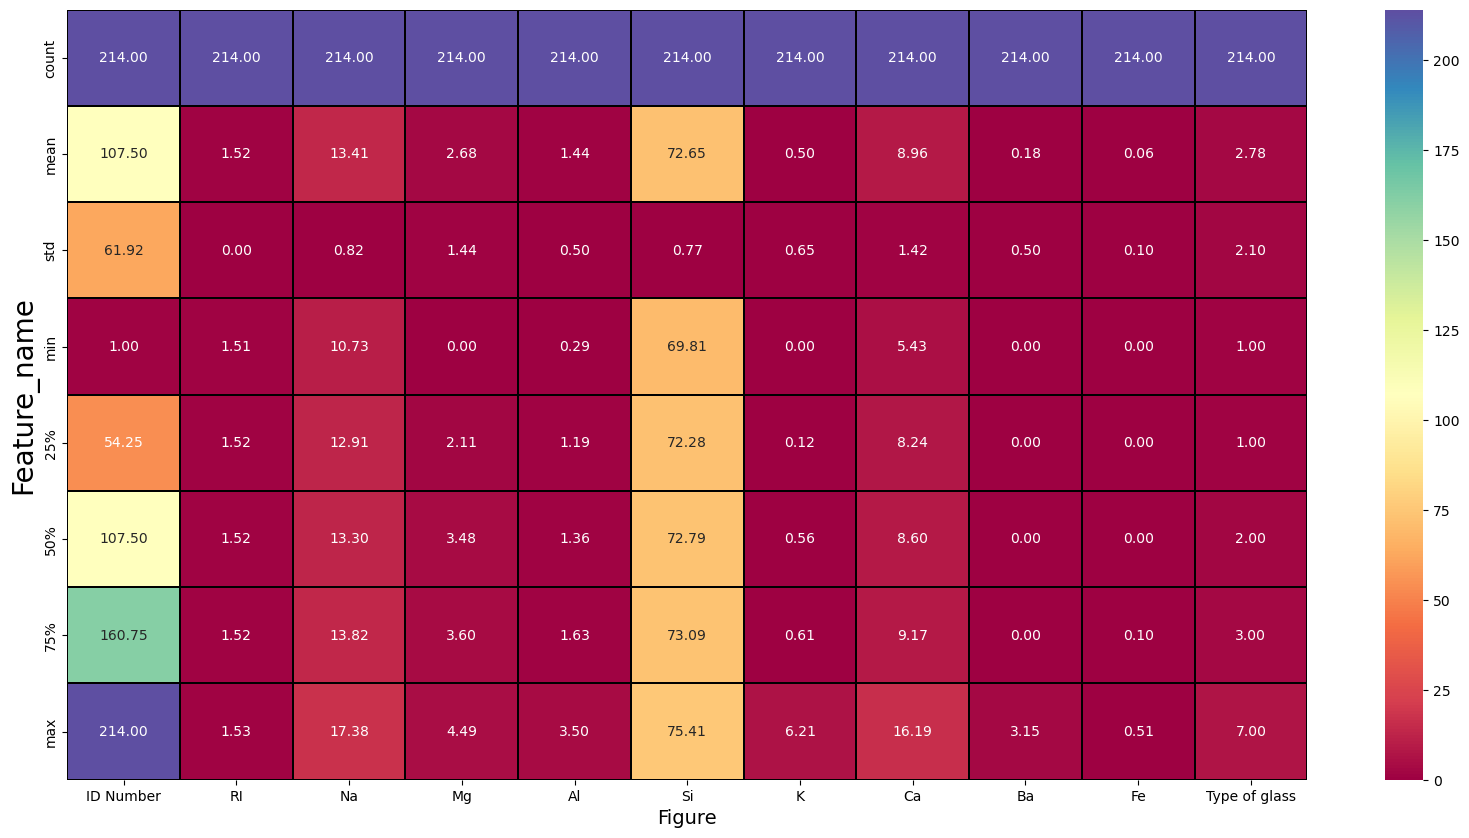

In [67]:
plt.figure(figsize=(20,10))
sns.heatmap(df.describe(), annot=True, fmt='0.2f',linewidth=0.2, linecolor='black', cmap='Spectral')
plt.xlabel('Figure', fontsize=14)
plt.ylabel('Feature_name', fontsize=20)
plt.show()

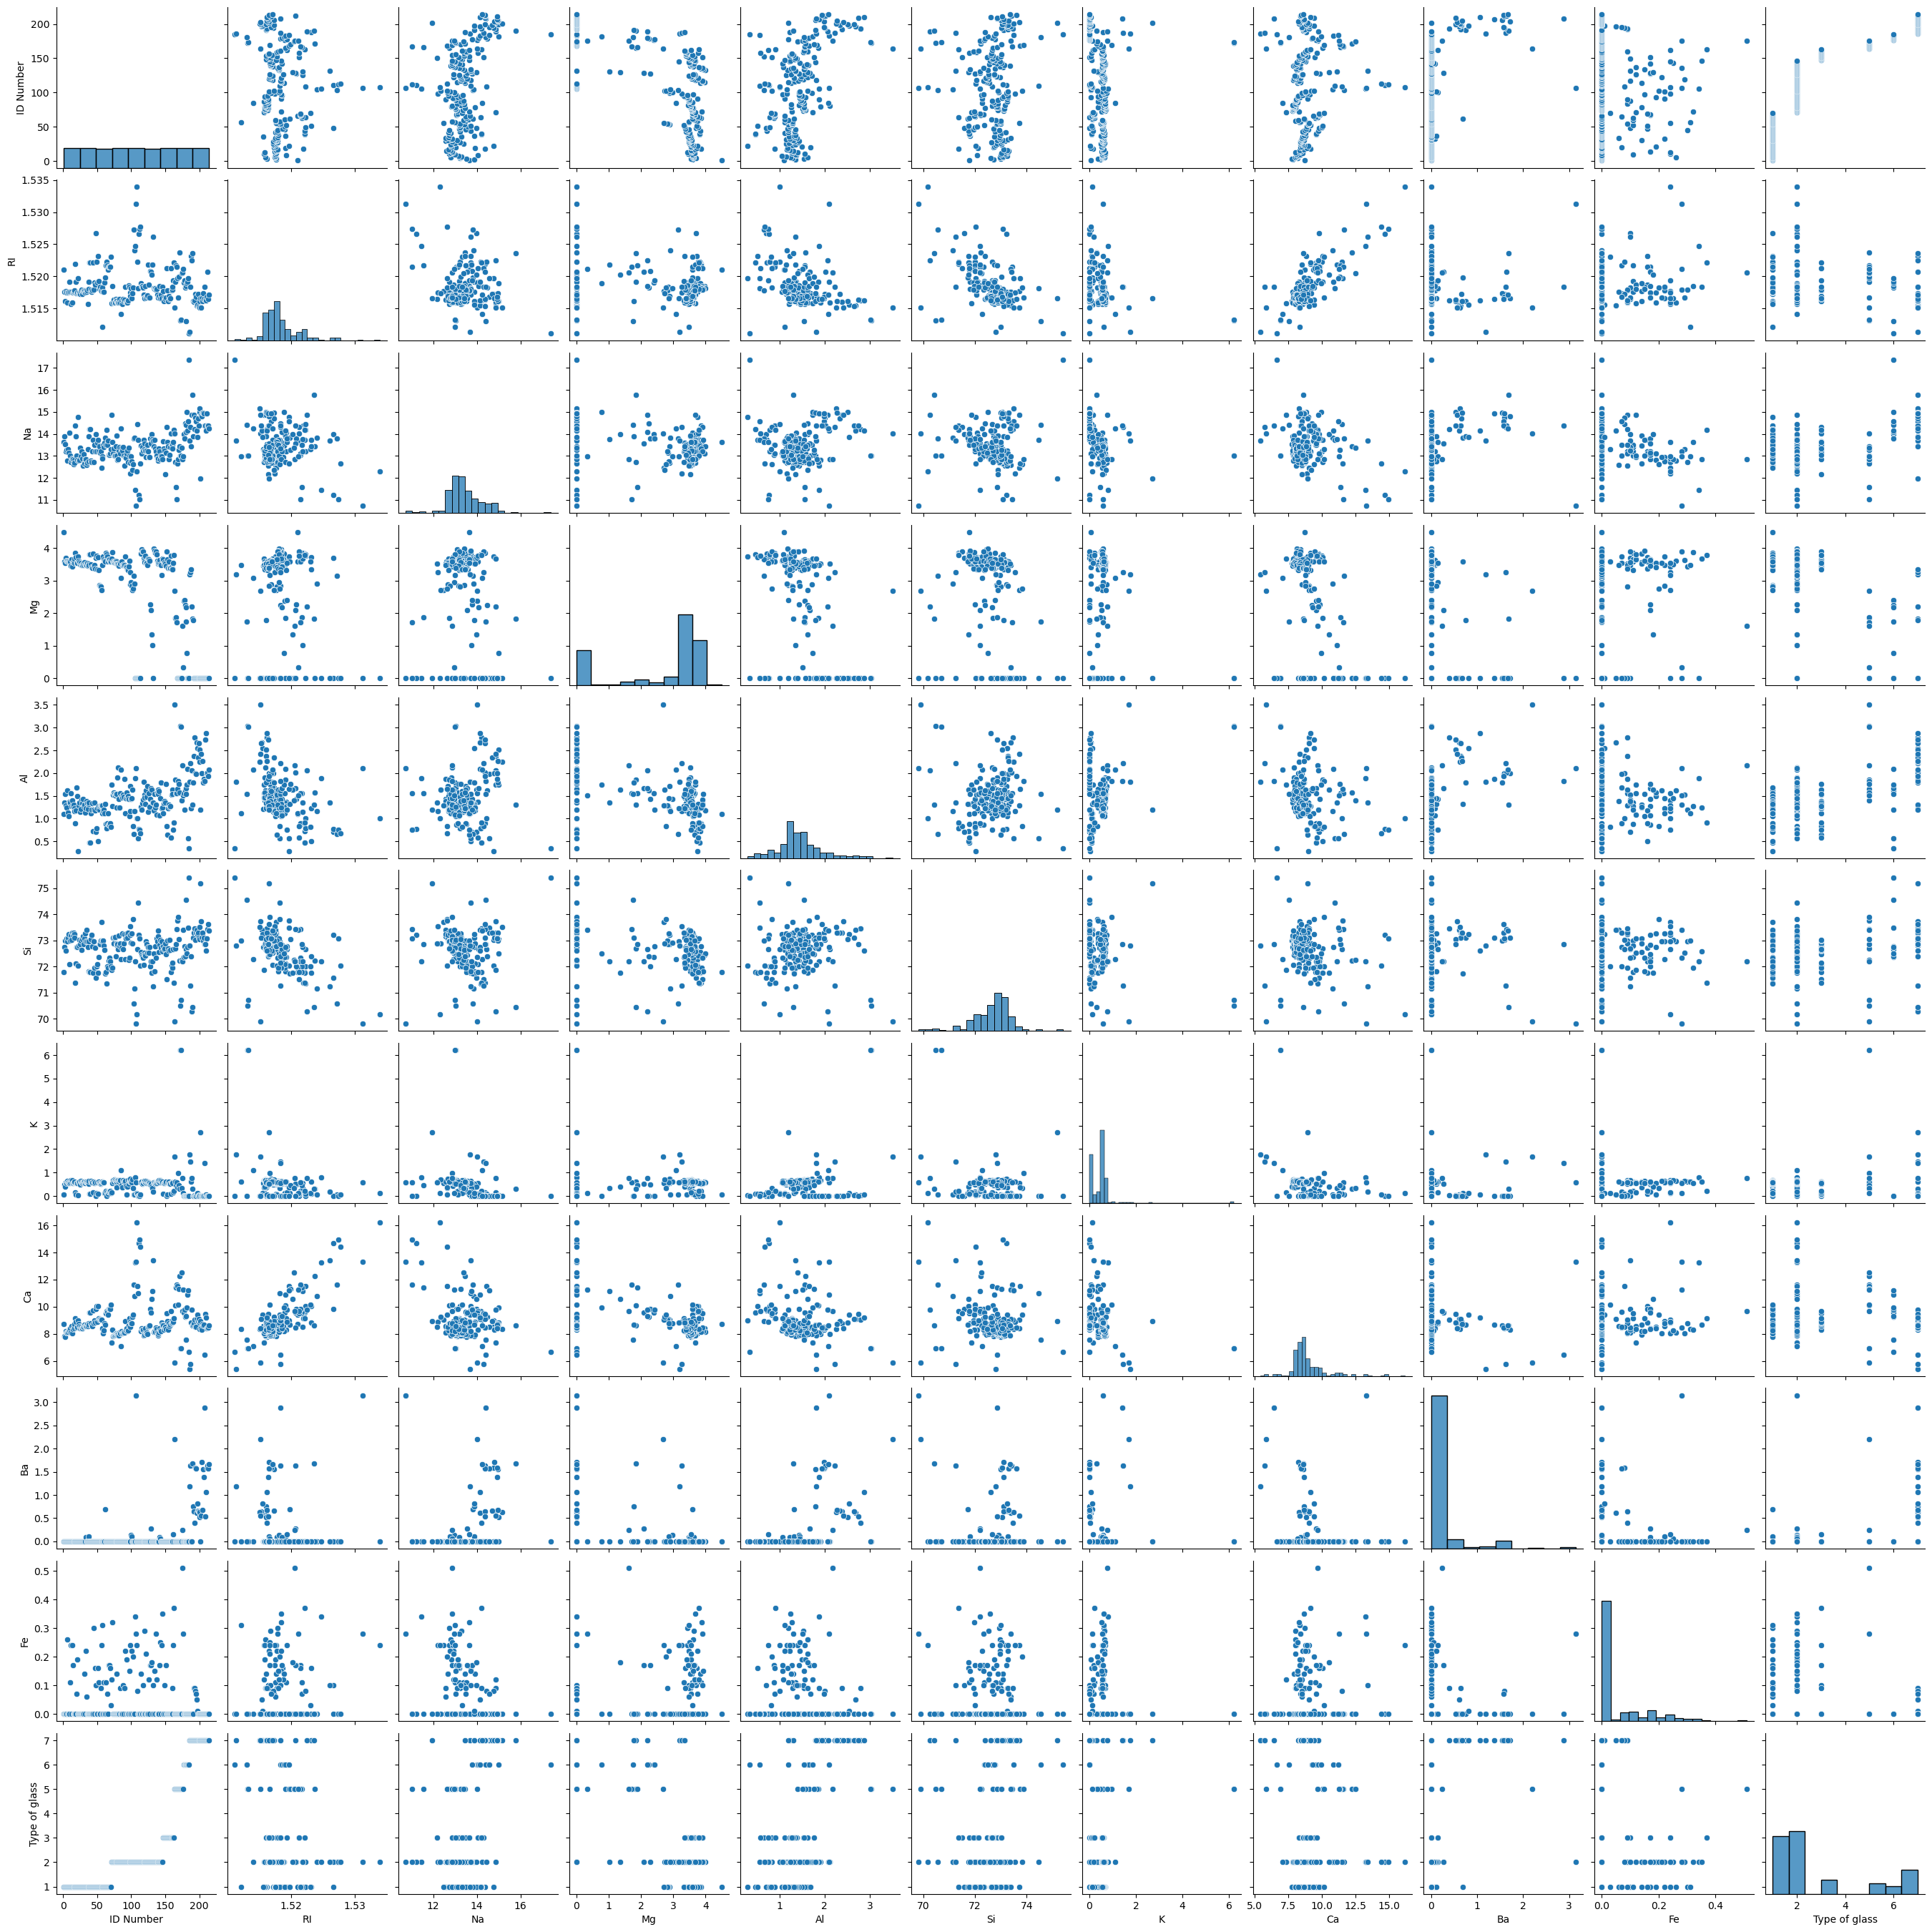

In [68]:
# draw the pairplot 

sns.pairplot(data=df, palette="Dark2")

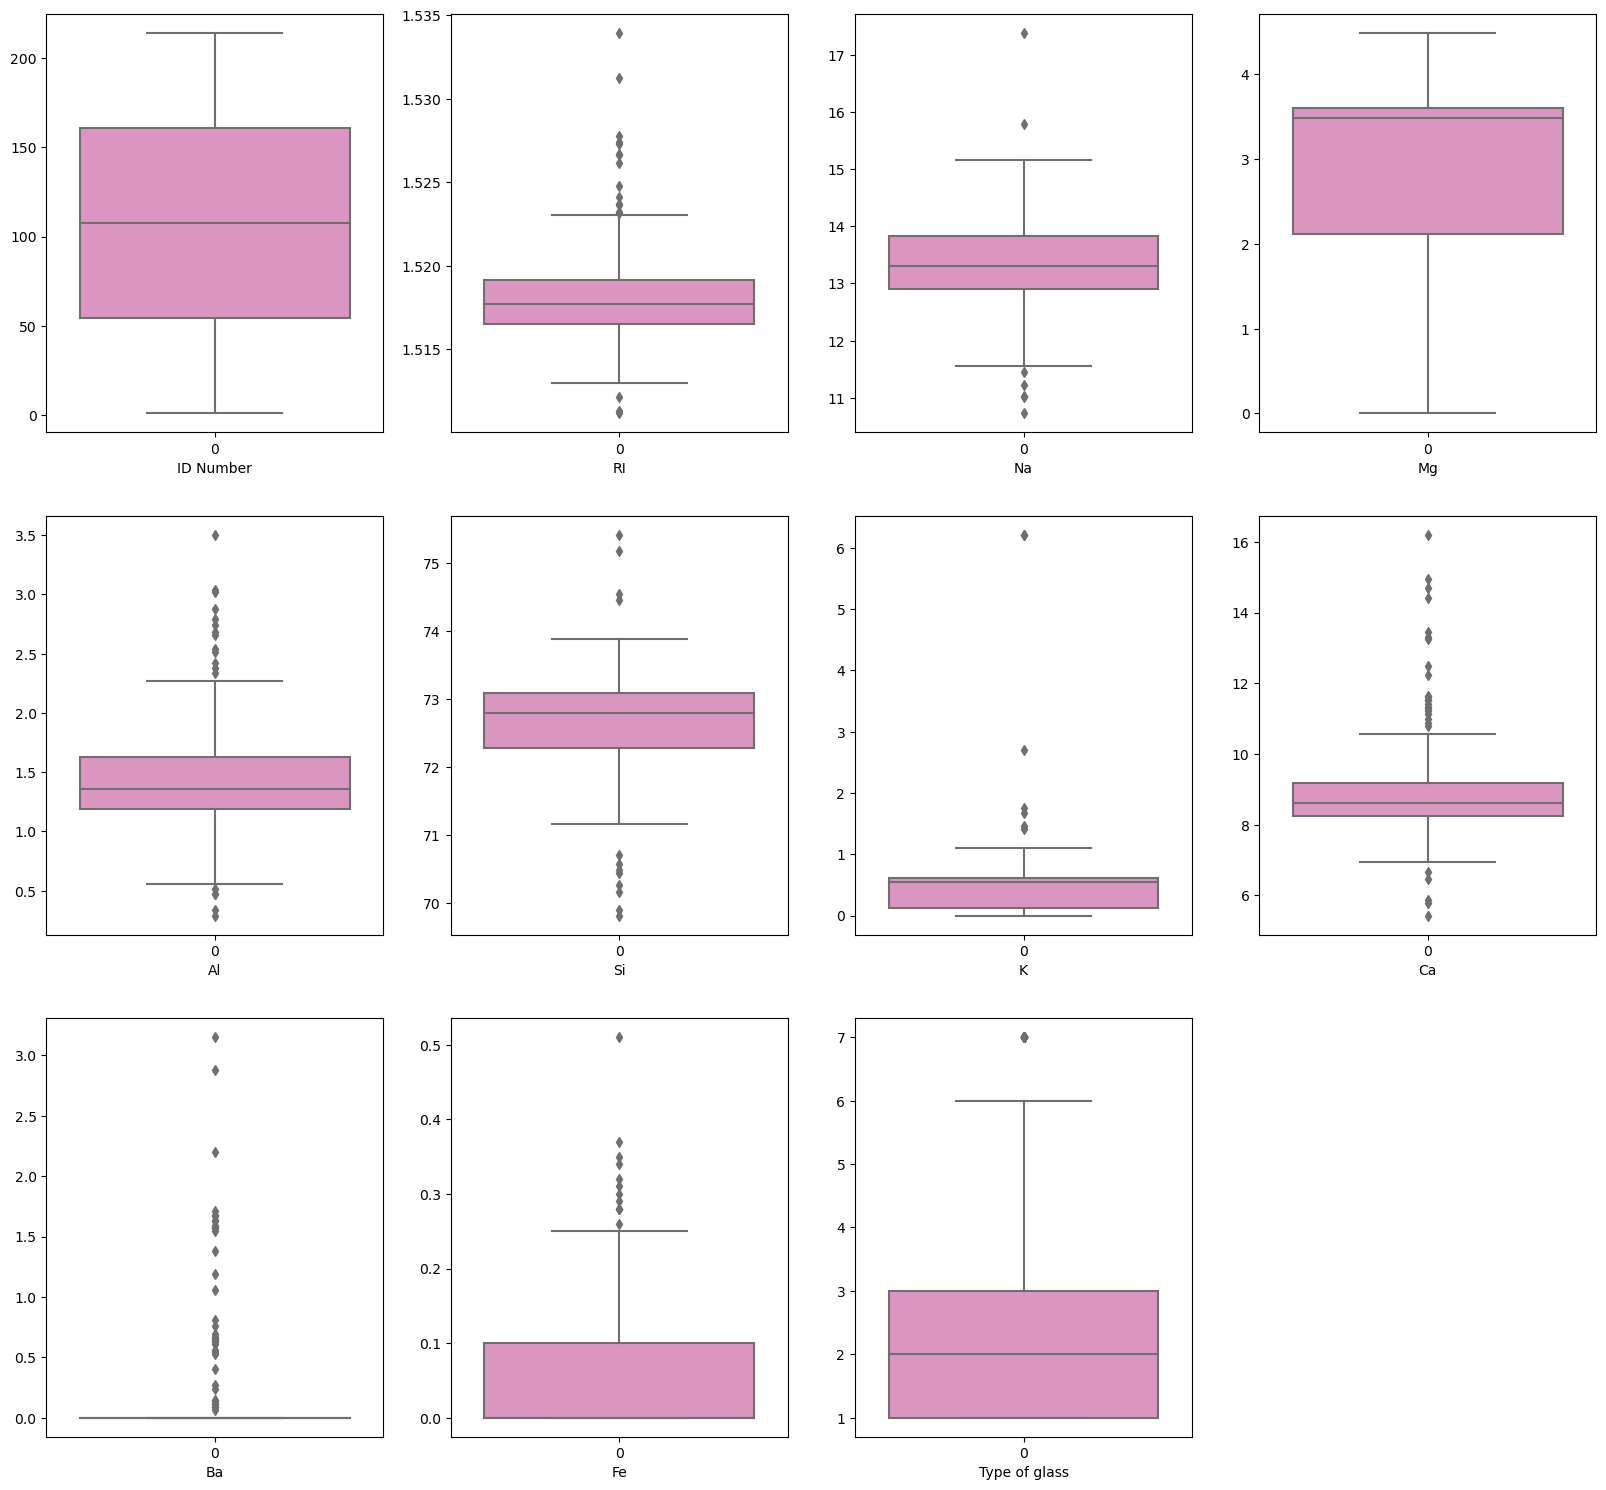

In [75]:
# draw the box plot to check outliers

plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=11:
        plt.subplot(4,4,p)
        sns.boxplot(df[i],palette="Set2_r")
        plt.xlabel(i)
    p+=1
plt.show()

In [76]:
# Remove outliers using zscore method
from scipy.stats import zscore
out_features=df[['RI','Na','Al','Si','K','Ca','Ba']]
z=np.abs(zscore(out_features))
z

,RI,Na,Al,Si,K,Ca,Ba
0,0.872868,0.284953,0.692442,1.127082,0.671705,0.145766,0.352877
1,0.249333,0.591817,0.170460,0.102319,0.026213,0.793734,0.352877
2,0.721318,0.149933,0.190912,0.438787,0.164533,0.828949,0.352877
3,0.232831,0.242853,0.310994,0.052974,0.112107,0.519052,0.352877
4,0.312045,0.169205,0.411375,0.555256,0.081369,0.624699,0.352877
...,...,...,...,...,...,...,...
209,0.704815,0.898681,2.881125,0.052974,0.640968,0.157088,1.783978
210,0.500178,1.856097,1.094342,0.529374,0.763919,0.392276,2.852405
211,0.754046,1.168721,1.154570,0.995252,0.763919,0.364103,2.953200
212,0.612399,1.193270,0.993960,1.241133,0.763919,0.335931,2.812087


In [77]:
np.where(z>3)

(array([105, 106, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112,
        131, 163, 163, 163, 171, 171, 172, 172, 184, 184, 188, 189, 201,
        201, 203, 207, 213], dtype=int64),
 array([5, 0, 1, 3, 5, 6, 0, 3, 5, 5, 5, 0, 5, 5, 2, 3, 6, 2, 4, 2, 4, 1,
        3, 3, 6, 3, 4, 6, 6, 6], dtype=int64))

In [78]:
z.iloc[105,5]

3.01659640155971

In [79]:
    # now removing the data above Zscore and creating new DF
    df1 = df[(z<3).all(axis=1)]

    df1.shape

(197, 11)

In [80]:
# shape of new and old data frame 

print("Old Data Frame - ", df.shape[0])
print("New Data Frame - ", df1.shape[0])

Old Data Frame -  214
New Data Frame -  197


In [81]:
# check the data loss

print("Data Loss Percentage - " , ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage -  7.943925233644859


In [82]:
df1

,ID Number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
208,209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


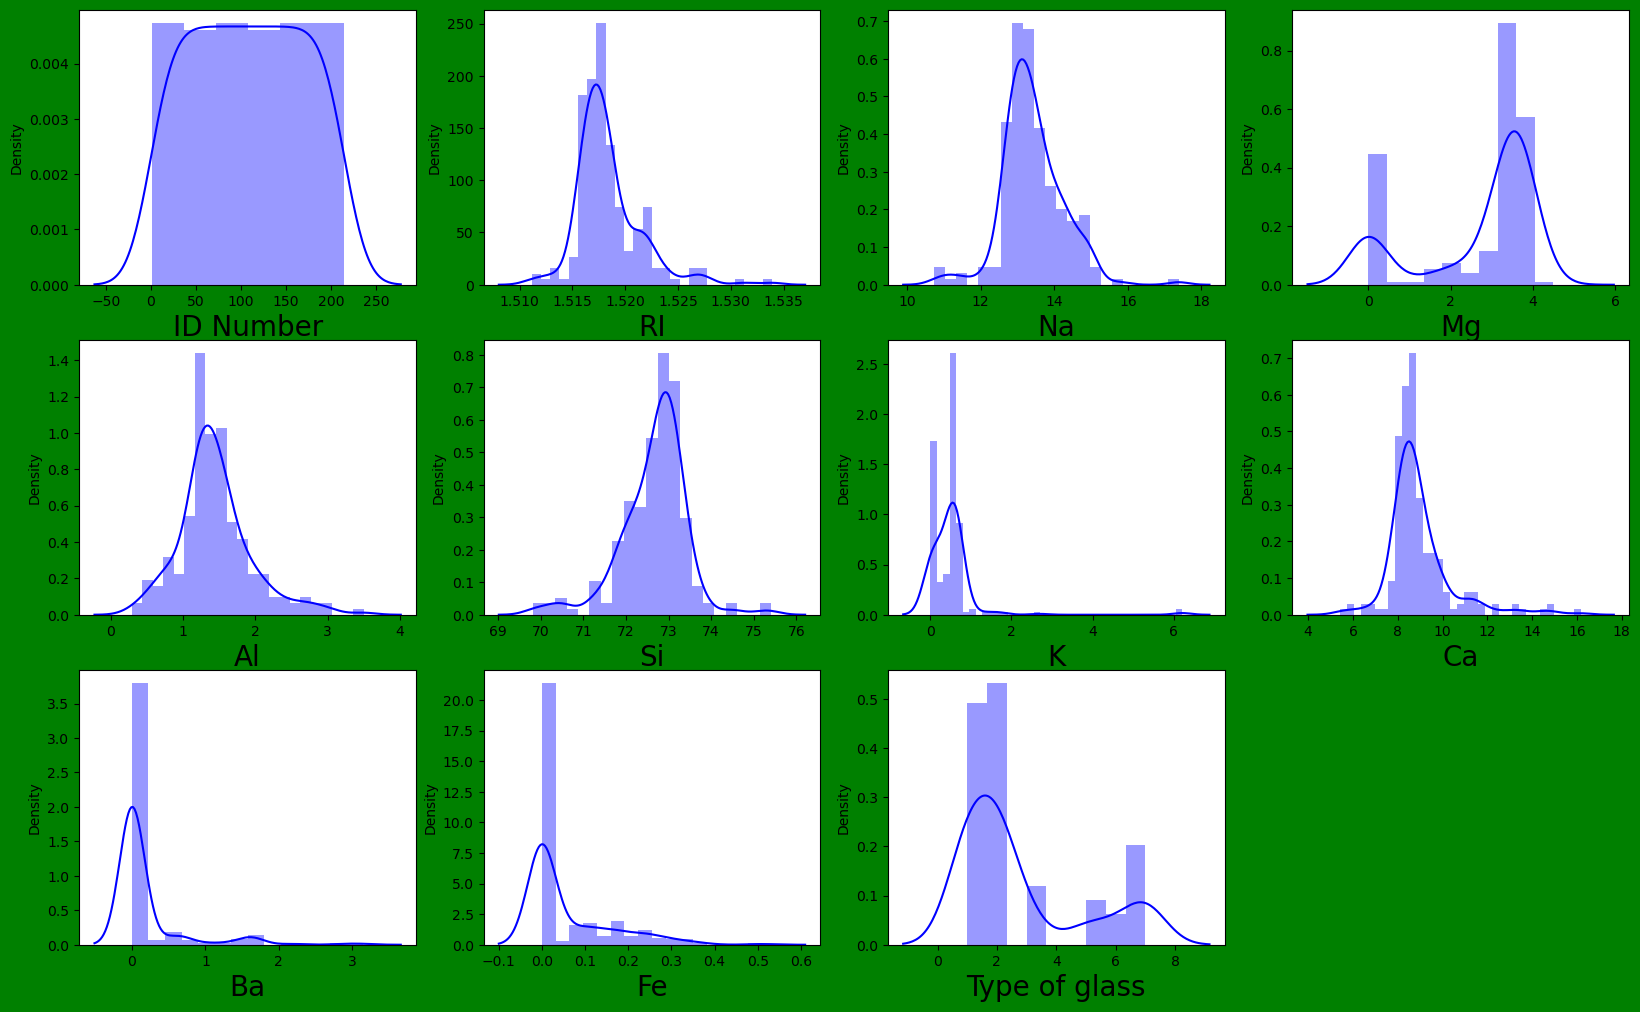

In [83]:
# check skewness of features using displot 

plt.figure(figsize=(20,25), facecolor='green')
plotnumber=1
for column in df:
    if plotnumber<=11:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color="b")
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()



In [84]:
df.skew()

ID Number        0.000000
RI               1.625431
Na               0.454181
Mg              -1.152559
Al               0.907290
Si              -0.730447
K                6.551648
Ca               2.047054
Ba               3.416425
Fe               1.754327
Type of glass    1.114915
dtype: float64

In [85]:
df['K']=np.cbrt(df['K'])

In [86]:
df.skew()

ID Number        0.000000
RI               1.625431
Na               0.454181
Mg              -1.152559
Al               0.907290
Si              -0.730447
K               -0.591896
Ca               2.047054
Ba               3.416425
Fe               1.754327
Type of glass    1.114915
dtype: float64

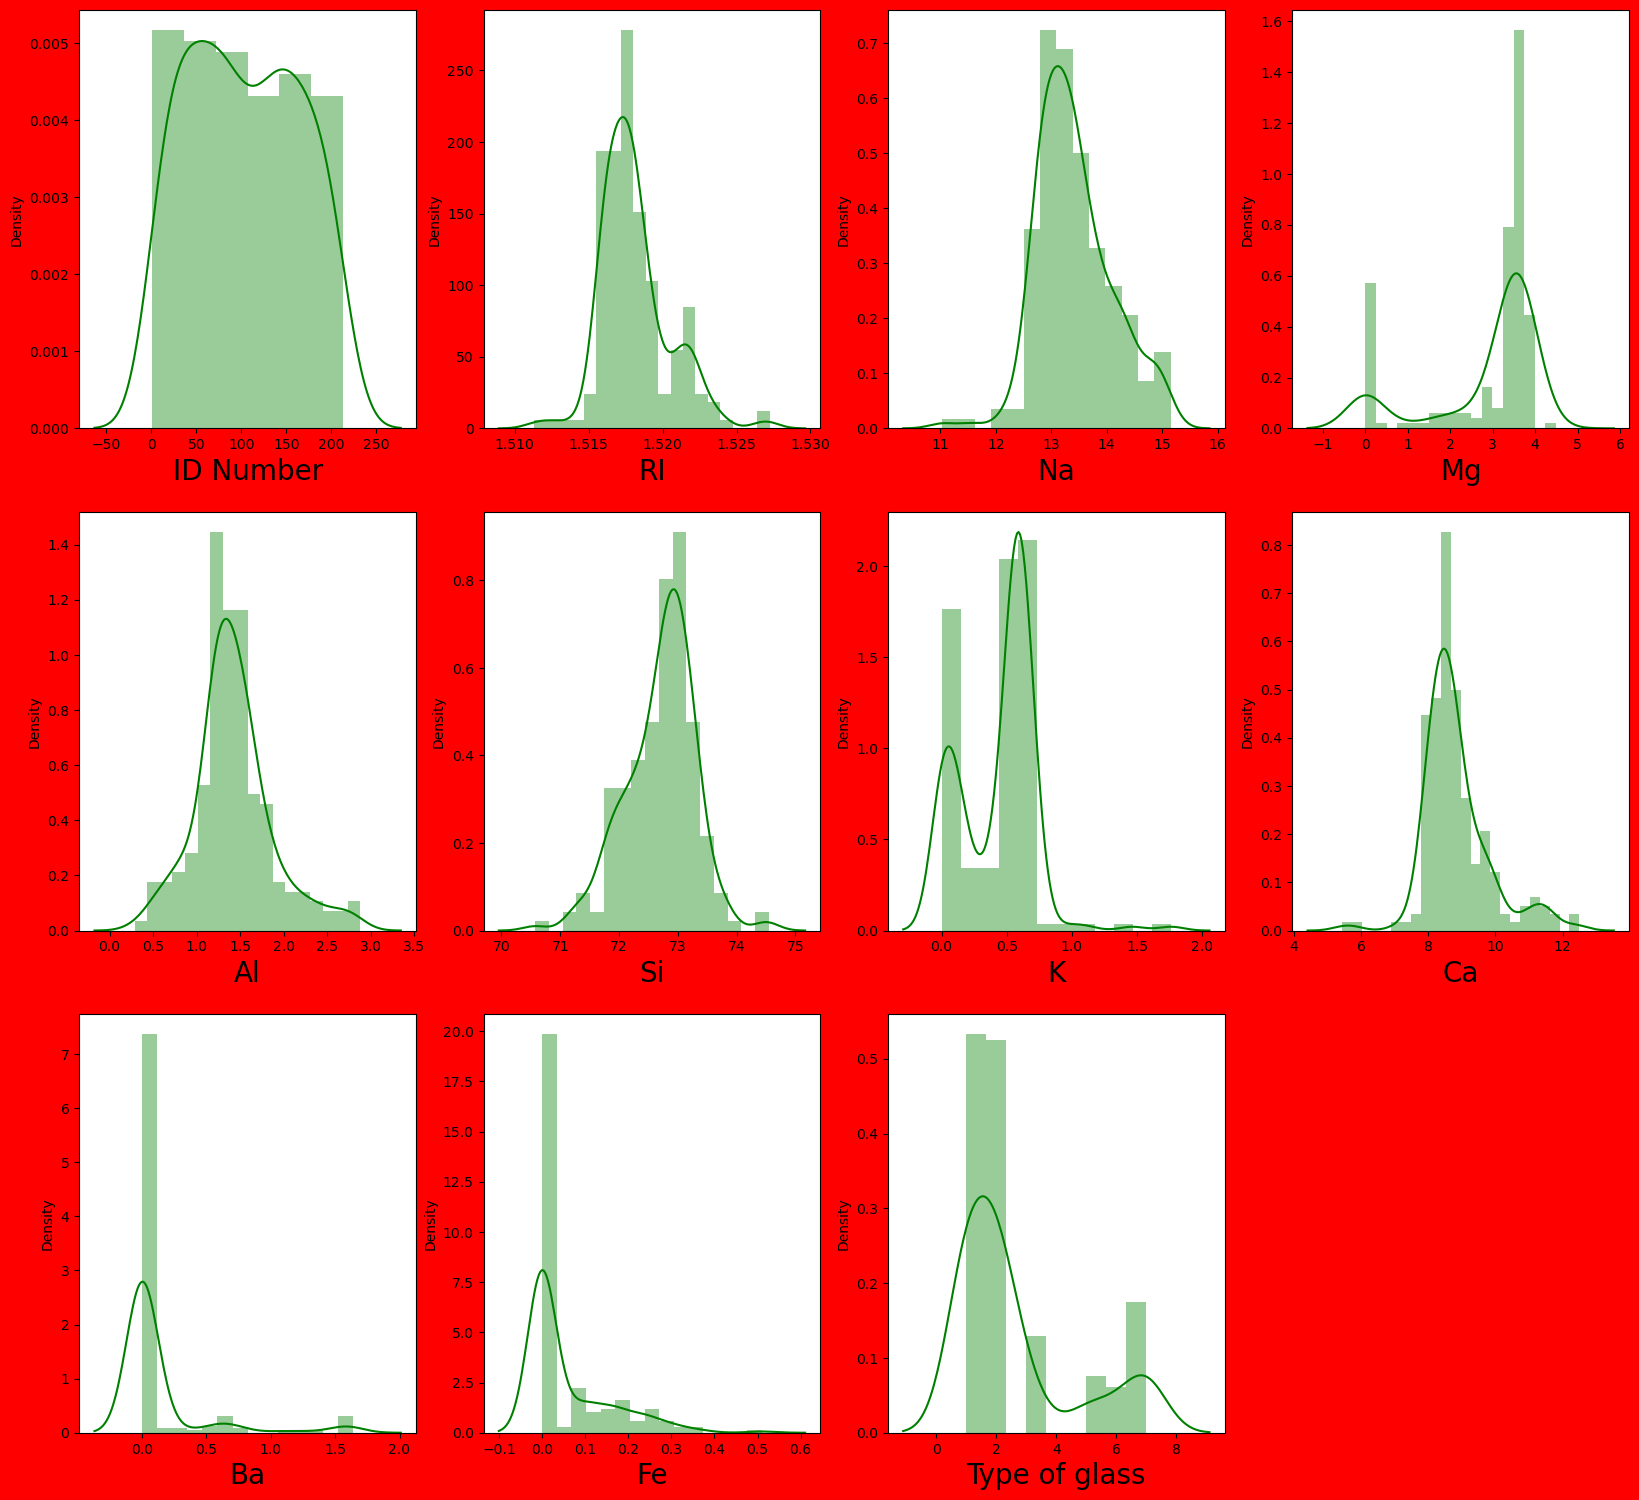

In [87]:
# Let us visualize again 


plt.figure(figsize=(20,25), facecolor='red')
plotnumber=1
for column in df1:
    if plotnumber<=11:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df1[column],color="green")
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()



In [88]:
df.corr()

,ID Number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
ID Number,1.000000,-0.072209,0.375722,-0.650328,0.490113,0.061232,-0.343410,0.090800,0.451001,-0.072794,0.877357
RI,-0.072209,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.211897,0.810403,-0.000386,0.143010,-0.164237
Na,0.375722,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.539820,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.650328,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.443489,-0.443750,-0.492262,0.083060,-0.744993
Al,0.490113,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.066251,-0.259592,0.479404,-0.074402,0.598829
Si,0.061232,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.172056,-0.208732,-0.102151,-0.094201,0.151565
K,-0.343410,-0.211897,-0.539820,0.443489,0.066251,-0.172056,1.000000,-0.333622,-0.258537,0.150170,-0.433255
Ca,0.090800,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.333622,1.000000,-0.112841,0.124968,0.000952
Ba,0.451001,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.258537,-0.112841,1.000000,-0.058692,0.575161
Fe,-0.072794,0.143010,-0.241346,0.083060,-0.074402,-0.094201,0.150170,0.124968,-0.058692,1.000000,-0.188278


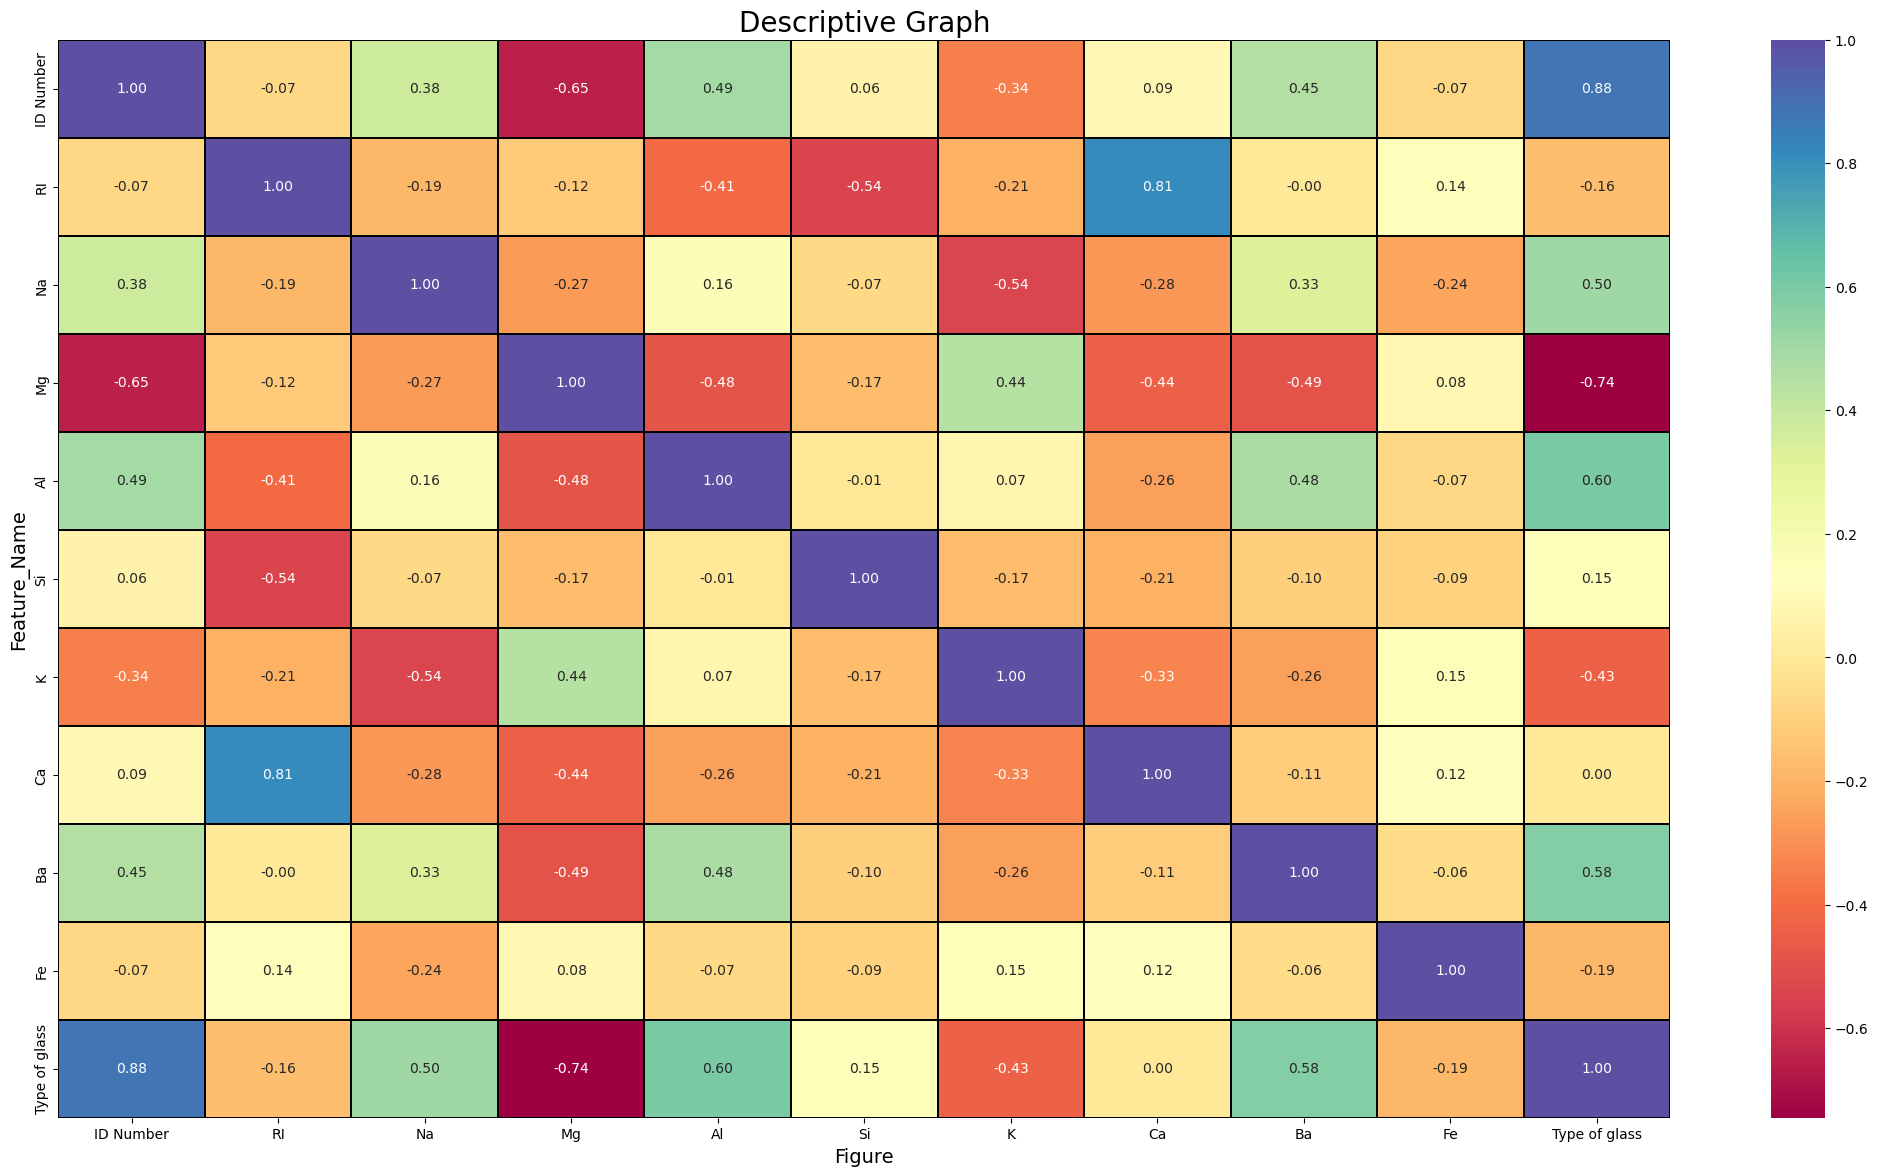

In [89]:
# Draw correlation using heatmap

plt.figure(figsize=(26,14))
sns.heatmap(df.corr(), annot=True, fmt='0.2f',linewidth=0.2, linecolor='black', cmap='Spectral')
plt.xlabel('Figure',fontsize=14)
plt.ylabel('Feature_Name', fontsize=14)
plt.title('Descriptive Graph', fontsize=20)
plt.show()

<Figure size 2000x1500 with 0 Axes>

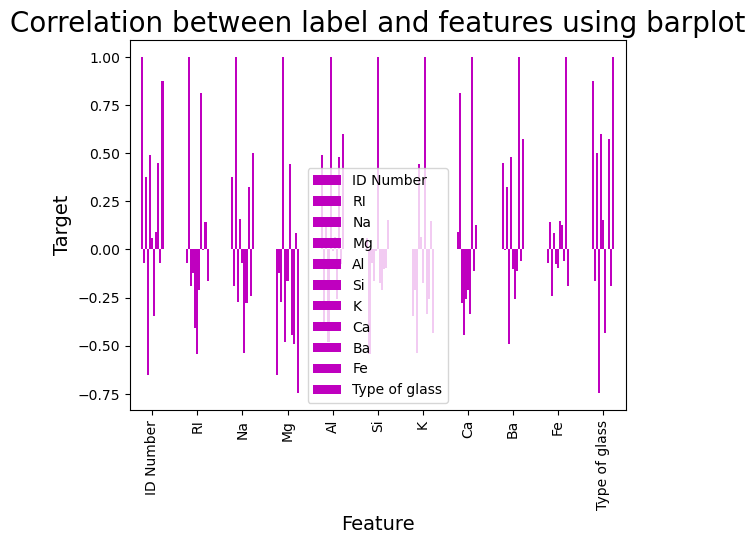

In [90]:
# correlation between features and label using barplot


plt.figure(figsize=(20,15))
df.corr().plot(kind='bar', color="m")
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target', fontsize=14)
plt.title('Correlation between label and features using barplot', fontsize=20)
plt.show()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64


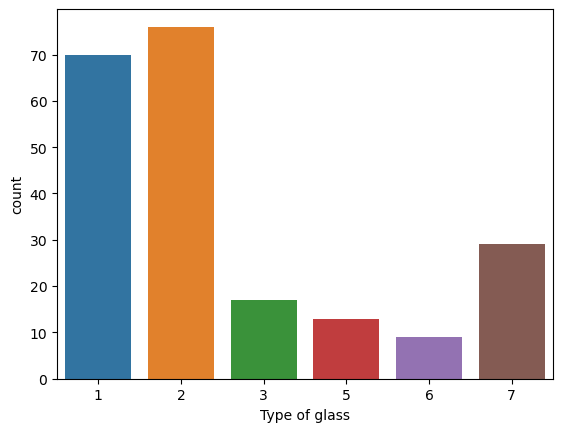

In [91]:
# check type of glass using countplot
ax = sns.countplot(x='Type of glass', data=df)
print(df['Type of glass'].value_counts())

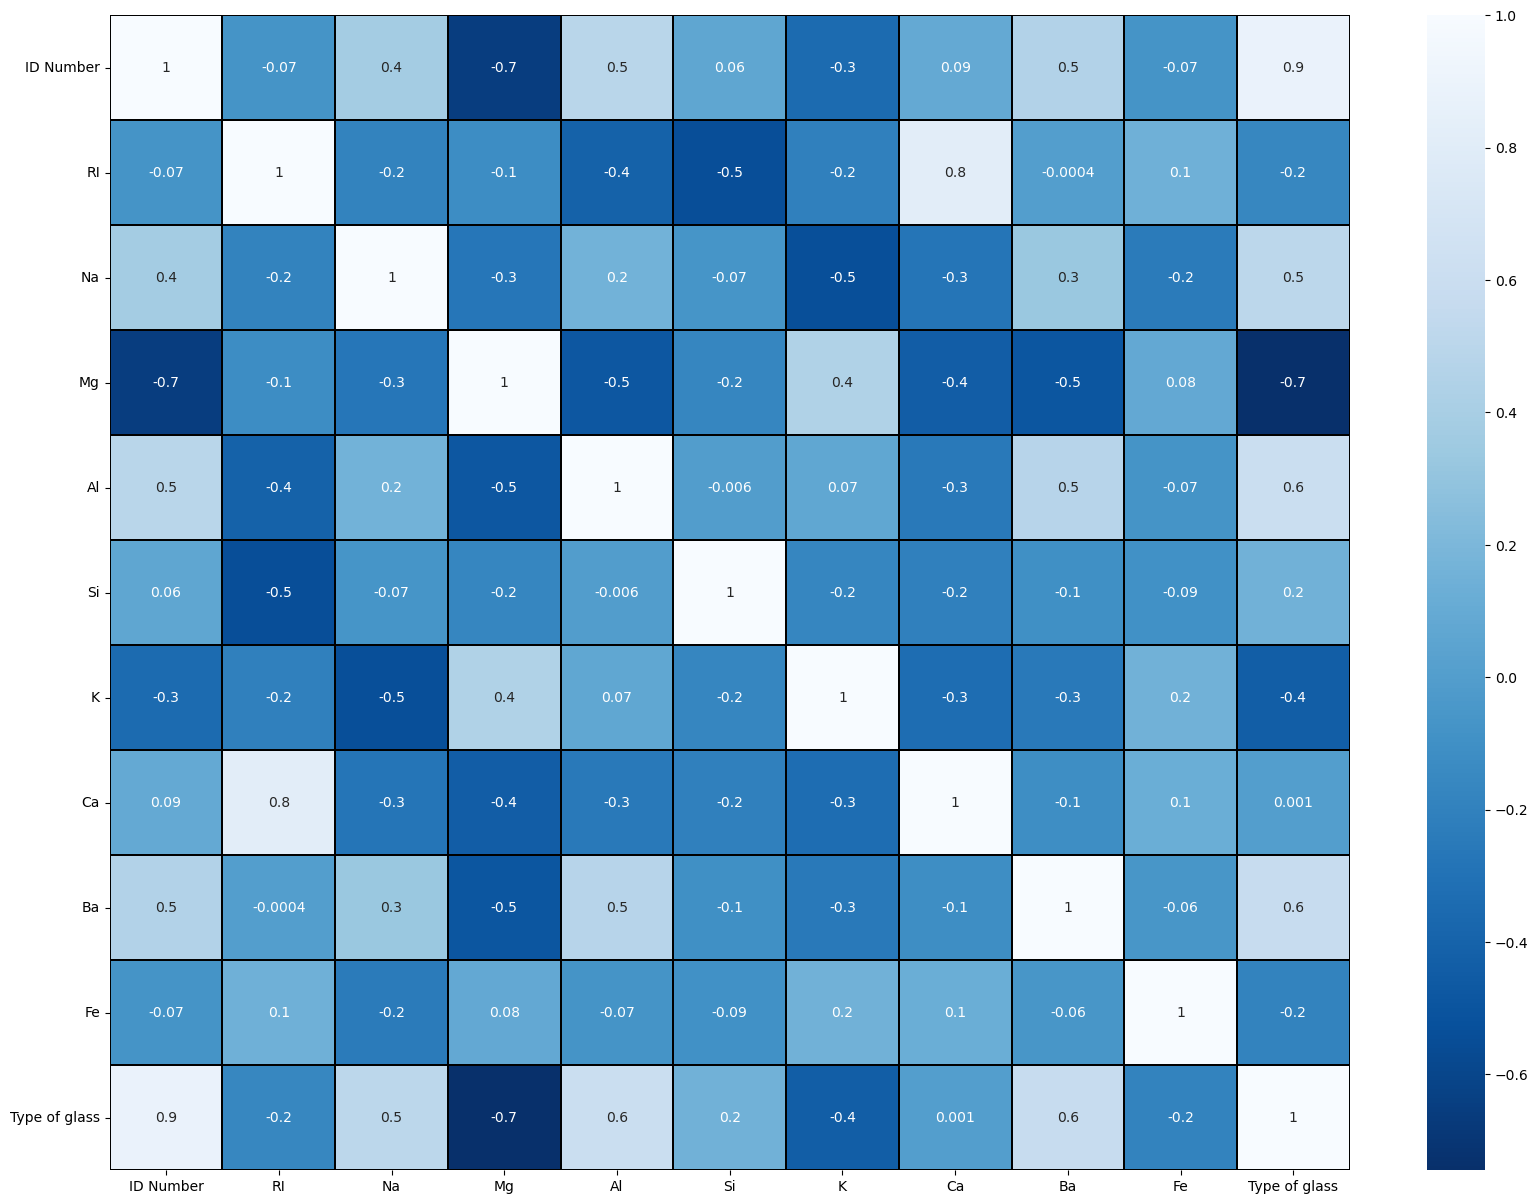

In [93]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), linewidths = 0.1, fmt = ".1g", linecolor = "black", annot = True, cmap = "Blues_r")
plt.yticks(rotation = 0);
plt.show()


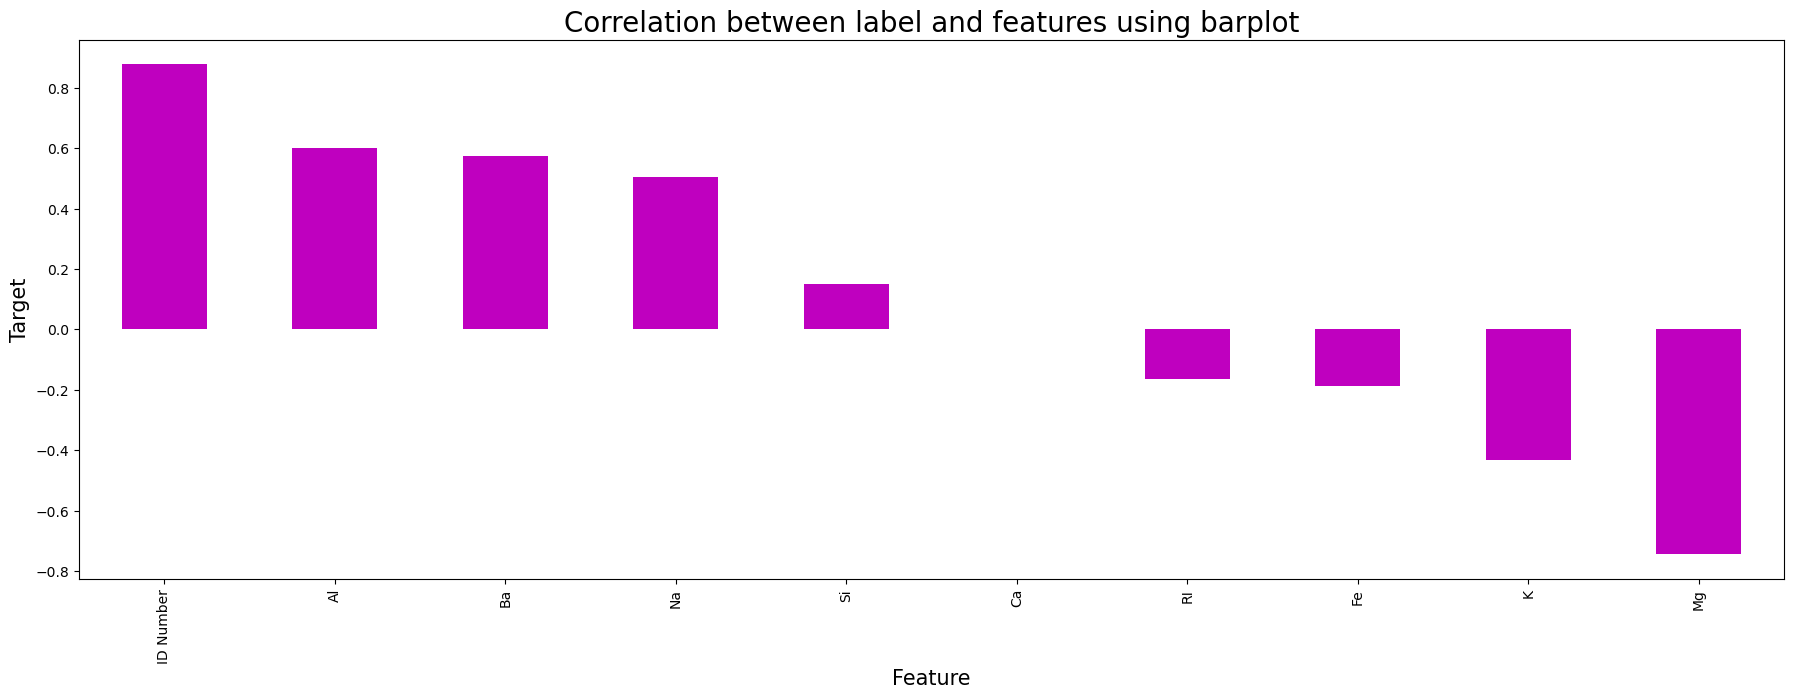

In [99]:
plt.figure(figsize=(22,7))
df.corr()['Type of glass'].sort_values(ascending=False).drop(['Type of glass']).plot(kind='bar', color="m")
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Target', fontsize = 15)
plt.title("Correlation between label and features using barplot", fontsize = 20)
plt.show()

# Separating features and label

In [100]:
x = df.drop("Type of glass",axis = 1)
y = df["Type of glass"]

# Feature scaling using standard Scalarization

In [101]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns = x.columns)
x

,ID Number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,-1.723976,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.835901,-0.145766,-0.352877,-0.586451
1,-1.707788,-0.249333,0.591817,0.636168,-0.170460,0.102319,0.346205,-0.793734,-0.352877,-0.586451
2,-1.691601,-0.721318,0.149933,0.601422,0.190912,0.438787,0.188105,-0.828949,-0.352877,-0.586451
3,-1.675413,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.485589,-0.519052,-0.352877,-0.586451
4,-1.659226,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.455958,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...,...
209,1.659226,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.716931,0.157088,1.783978,-0.586451
210,1.675413,-0.500178,1.856097,-1.865511,1.094342,0.529374,-2.018006,-0.392276,2.852405,-0.586451
211,1.691601,0.754046,1.168721,-1.865511,1.154570,0.995252,-2.018006,-0.364103,2.953200,-0.586451
212,1.707788,-0.612399,1.193270,-1.865511,0.993960,1.241133,-2.018006,-0.335931,2.812087,-0.586451


In [102]:
# Finding varience inflation factor in each scaled column i.e., x.shape[1](1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["features"]=x.columns
vif

,VIF values,features
0,2.045649,ID Number
1,9.365966,RI
2,6.743863,Na
3,13.335355,Mg
4,4.403522,Al
5,5.172285,Si
6,4.592818,K
7,21.436971,Ca
8,3.653661,Ba
9,1.087599,Fe


In [103]:
# Again checking VIF values to confirm weather the multicollinearity still exists or not 

vif = pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,2.045649,ID Number
1,9.365966,RI
2,6.743863,Na
3,13.335355,Mg
4,4.403522,Al
5,5.172285,Si
6,4.592818,K
7,21.436971,Ca
8,3.653661,Ba
9,1.087599,Fe


In [105]:
# Droping ID Number column
x.drop("ID Number", axis = 1, inplace = True)

In [106]:
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values, i) for i in range (len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,9.364955,RI
1,6.735358,Na
2,12.603907,Mg
3,4.357883,Al
4,5.151568,Si
5,4.553592,K
6,21.376408,Ca
7,3.653660,Ba
8,1.084392,Fe


# Feature selection using PCA

In [110]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(x)

array([[ 0.92280137,  0.41987552, -0.67351504, ..., -0.82335604,
        -0.12705811,  0.15932273],
       [-0.13385194, -1.00003866, -0.50173269, ...,  0.20393325,
        -0.3305722 , -0.02231462],
       [-0.39300189, -1.32401901, -0.46905333, ..., -0.19174692,
        -0.13864487, -0.02454311],
       ...,
       [-3.58352706,  2.1935066 ,  0.01408544, ..., -0.23219349,
        -0.78419256,  0.35267091],
       [-3.96603433,  1.4315677 , -0.34222149, ..., -0.1590328 ,
         0.137074  ,  0.06105984],
       [-3.94131496,  1.66329354,  0.07664771, ..., -0.37555046,
         0.12477935,  0.06942921]])

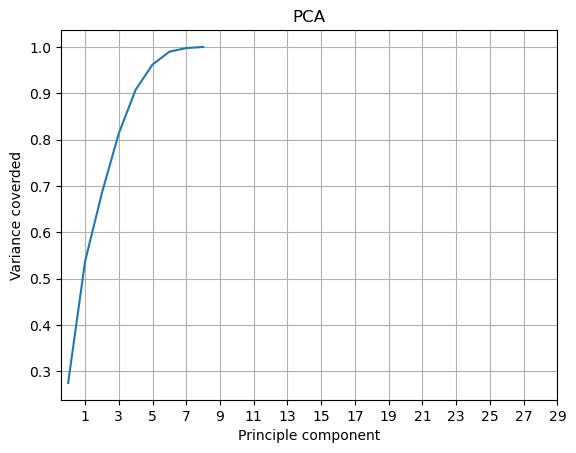

In [113]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid(axis='both')
plt.xticks(range(1,31,2))
plt.xlabel('Principle component')
plt.ylabel('Variance coverded')
plt.title('PCA')
plt.show()

In [116]:
pca = PCA(n_components=9)
new_x= pca.fit_transform(x)
new_x

array([[ 0.92280137,  0.41987552, -0.67351504, ..., -0.82335604,
        -0.12705811,  0.15932273],
       [-0.13385194, -1.00003866, -0.50173269, ...,  0.20393325,
        -0.3305722 , -0.02231462],
       [-0.39300189, -1.32401901, -0.46905333, ..., -0.19174692,
        -0.13864487, -0.02454311],
       ...,
       [-3.58352706,  2.1935066 ,  0.01408544, ..., -0.23219349,
        -0.78419256,  0.35267091],
       [-3.96603433,  1.4315677 , -0.34222149, ..., -0.1590328 ,
         0.137074  ,  0.06105984],
       [-3.94131496,  1.66329354,  0.07664771, ..., -0.37555046,
         0.12477935,  0.06942921]])

# Model development

In [ ]:


X=new_x
y=df["Type of glass"].values

In [118]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [121]:
# Data split into train and test 

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [122]:
# Checking accuracy for RandomForestClassifier 
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))


0.7384615384615385
[[16  5  2  0  0  0]
 [ 2 19  2  1  1  0]
 [ 0  0  2  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  0  1  0  1  1]
 [ 0  1  0  0  0  9]]
              precision    recall  f1-score   support

           1       0.89      0.70      0.78        23
           2       0.73      0.76      0.75        25
           3       0.29      1.00      0.44         2
           5       0.50      0.50      0.50         2
           6       0.50      0.33      0.40         3
           7       0.90      0.90      0.90        10

    accuracy                           0.74        65
   macro avg       0.63      0.70      0.63        65
weighted avg       0.78      0.74      0.75        65



In [123]:
# Checking accuracy for LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))


0.6923076923076923
[[13  7  3  0  0  0]
 [ 3 19  2  1  0  0]
 [ 0  2  0  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  0  0  0  3  0]
 [ 1  0  0  0  0  9]]
              precision    recall  f1-score   support

           1       0.76      0.57      0.65        23
           2       0.66      0.76      0.70        25
           3       0.00      0.00      0.00         2
           5       0.50      0.50      0.50         2
           6       1.00      1.00      1.00         3
           7       1.00      0.90      0.95        10

    accuracy                           0.69        65
   macro avg       0.65      0.62      0.63        65
weighted avg       0.74      0.69      0.71        65



In [124]:
# Checking accuracy for support vector machine classifier 
svc = SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))


0.8153846153846154
[[18  5  0  0  0  0]
 [ 2 23  0  0  0  0]
 [ 1  1  0  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  0  0  0  2  1]
 [ 1  0  0  0  0  9]]
              precision    recall  f1-score   support

           1       0.82      0.78      0.80        23
           2       0.77      0.92      0.84        25
           3       0.00      0.00      0.00         2
           5       1.00      0.50      0.67         2
           6       1.00      0.67      0.80         3
           7       0.90      0.90      0.90        10

    accuracy                           0.82        65
   macro avg       0.75      0.63      0.67        65
weighted avg       0.80      0.82      0.80        65



In [125]:
# Checking accuracy for Gradient Boosting classifier 
GB = GradientBoostingClassifier()
GB.fit(x_train, y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))


0.6923076923076923
[[16  5  2  0  0  0]
 [ 5 16  2  2  0  0]
 [ 0  0  2  0  0  0]
 [ 1  0  0  1  0  0]
 [ 1  0  0  0  1  1]
 [ 0  1  0  0  0  9]]
              precision    recall  f1-score   support

           1       0.70      0.70      0.70        23
           2       0.73      0.64      0.68        25
           3       0.33      1.00      0.50         2
           5       0.33      0.50      0.40         2
           6       1.00      0.33      0.50         3
           7       0.90      0.90      0.90        10

    accuracy                           0.69        65
   macro avg       0.66      0.68      0.61        65
weighted avg       0.73      0.69      0.70        65



In [126]:
# Checking accuracy for AdaBoost classifier 
ABC = AdaBoostClassifier()
ABC.fit(x_train, y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test, predABC))


0.46153846153846156
[[ 0 23  0  0  0  0]
 [ 0 25  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  1  0  0  2  0]
 [ 0  0  0  0  7  3]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        23
           2       0.47      1.00      0.64        25
           3       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.22      0.67      0.33         3
           7       1.00      0.30      0.46        10

    accuracy                           0.46        65
   macro avg       0.28      0.33      0.24        65
weighted avg       0.35      0.46      0.33        65



In [127]:
# Checking accuracy for Bagging classifier 
BC = BaggingClassifier()
BC.fit(x_train, y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test, predBC))
print(confusion_matrix(y_test, predBC))
print(classification_report(y_test, predBC))


0.6615384615384615
[[15  5  3  0  0  0]
 [ 3 16  3  3  0  0]
 [ 1  0  1  0  0  0]
 [ 1  0  0  1  0  0]
 [ 0  0  1  0  1  1]
 [ 1  0  0  0  0  9]]
              precision    recall  f1-score   support

           1       0.71      0.65      0.68        23
           2       0.76      0.64      0.70        25
           3       0.12      0.50      0.20         2
           5       0.25      0.50      0.33         2
           6       1.00      0.33      0.50         3
           7       0.90      0.90      0.90        10

    accuracy                           0.66        65
   macro avg       0.63      0.59      0.55        65
weighted avg       0.74      0.66      0.69        65



In [128]:
# Checking accuracy for Extra Tree classifier 
ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))


0.8153846153846154
[[17  4  2  0  0  0]
 [ 2 21  1  1  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  1]
 [ 0  1  0  0  0  9]]
              precision    recall  f1-score   support

           1       0.89      0.74      0.81        23
           2       0.81      0.84      0.82        25
           3       0.40      1.00      0.57         2
           5       0.67      1.00      0.80         2
           6       1.00      0.67      0.80         3
           7       0.90      0.90      0.90        10

    accuracy                           0.82        65
   macro avg       0.78      0.86      0.78        65
weighted avg       0.84      0.82      0.82        65



In [137]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [138]:
def metric_score(clf, x_train,x_test,y_train,y_test, train = True):
    if train:
        y_pred = clf.predict(x_train)
        
        print("\n===============Train Result =============================")
        
        print(f"Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%")
        
    elif train==False :
        pred = clf.predict(x_test)
        
        print("\n===============Test Result =============================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
                        
        print('\n \n Test Classification Report \n', classification_report(y_test, pred, digits = 2)) ## model confidance/accuracy
        

In [139]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [140]:
# Call the function and pass dataset to check train and test score 
metric_score(svc,x_train,x_test,y_train,y_test,train=True)  #This is for training score 

metric_score(svc,x_train,x_test,y_train,y_test,train=False) # This is for testing score



===============Train Result =============================
Accuracy Score: 77.18%

===============Test Result =============================
Accuracy Score: 81.54%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.82      0.78      0.80        23
           2       0.77      0.92      0.84        25
           3       0.00      0.00      0.00         2
           5       1.00      0.50      0.67         2
           6       1.00      0.67      0.80         3
           7       0.90      0.90      0.90        10

    accuracy                           0.82        65
   macro avg       0.75      0.63      0.67        65
weighted avg       0.80      0.82      0.80        65



In [143]:
from sklearn.model_selection import GridSearchCV

#  Hyper parameter tunning 

In [144]:
param_grid = {'C':[1,5,10,20],
              'gamma': [0.001,0.01,0.02,0.002]
             }

In [146]:
gridsearch= GridSearchCV(svc, param_grid)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

{'C': 20, 'gamma': 0.02}

In [147]:
svc=SVC(C=20, gamma=0.02)
svc.fit(x_train,y_train)

metric_score(svc,x_train,x_test,y_train,y_test,train=True)  #This is for training score 

metric_score(svc,x_train,x_test,y_train,y_test,train=False) # This is for testing score



===============Train Result =============================
Accuracy Score: 79.87%

===============Test Result =============================
Accuracy Score: 80.00%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.75      0.78      0.77        23
           2       0.80      0.80      0.80        25
           3       0.00      0.00      0.00         2
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      0.90      0.95        10

    accuracy                           0.80        65
   macro avg       0.70      0.75      0.72        65
weighted avg       0.79      0.80      0.80        65



# Saving the model

In [158]:
import joblib
joblib.dump(gridsearch, "glass_identificatio.pkl")

['glass_identificatio.pkl']

# Predicting the saved model

In [159]:
# Let's load the saved model and get the prediction 

model = joblib.load("glass_identificatio.pkl")

# Prediction 

prediction = model.predict(x_test)
prediction

array([2, 1, 2, 1, 5, 5, 2, 2, 6, 7, 2, 6, 5, 1, 2, 6, 2, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 7, 2, 1, 1, 7, 1, 7, 1, 7, 2, 1, 1, 2, 2, 7, 2,
       2, 2, 1, 1, 1, 1, 7, 1, 2, 1, 2, 1, 1, 1, 1, 7, 1, 3, 7, 1, 1],
      dtype=int64)

In [160]:
a = np.array(y_test)
data = pd.DataFrame()
data["Predicted"]=prediction
data["Original"]=a
data

,Predicted,Original
0,2,1
1,1,3
2,2,2
3,1,1
4,5,5
...,...,...
60,1,1
61,3,1
62,7,7
63,1,1
